In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

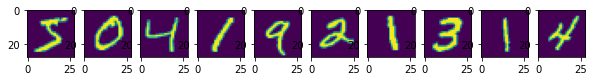

In [9]:
n=10
plt.figure(figsize=[10,1])
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(x_train[i]) # cmap="gray" for gray scale image
  plt.axis("on")
plt.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#y_train = tf.one_hot(y_train, 10)

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [7]:
model.fit(x_train,y_train, epochs=10)
loss, accuracy = model.evaluate(x_test, y_test)
print (loss)
print(accuracy)
model.save('digits.model')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4649 - accuracy: 0.8660
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1109 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1221 

In [13]:
from google.colab import files
uploaded = files.upload()

Saving 0.png to 0.png
Saving 1.png to 1 (1).png
Saving 2.png to 2 (1).png
Saving 3.png to 3 (1).png
Saving 4.png to 4 (1).png
Saving 5.png to 5.png
Saving 6.png to 6.png


It is  : 0


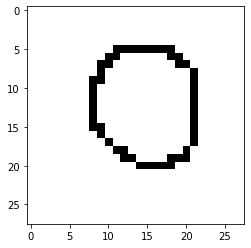

It is  : 1


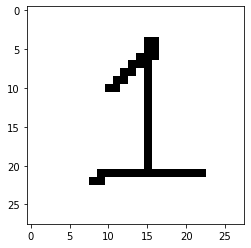

It is  : 7


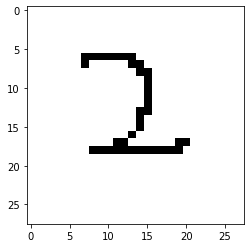

It is  : 3


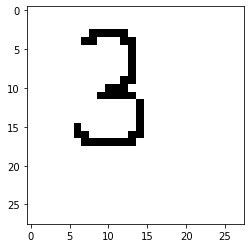

It is  : 2


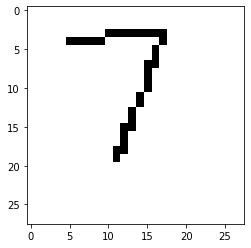

It is  : 3


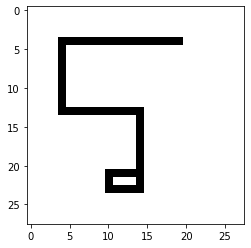

It is  : 3


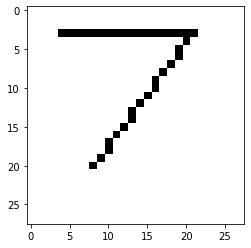

In [14]:
for x in range (0,7):
  img=cv.imread(f"{x}.png")[:,:,0]
  img=np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f"It is  : {np.argmax(prediction)}")
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()